In [10]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [6]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [8]:
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224,224),
    class_mode="binary",
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    class_mode="binary",
    batch_size=32
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [9]:
images, labels = train_data.next()

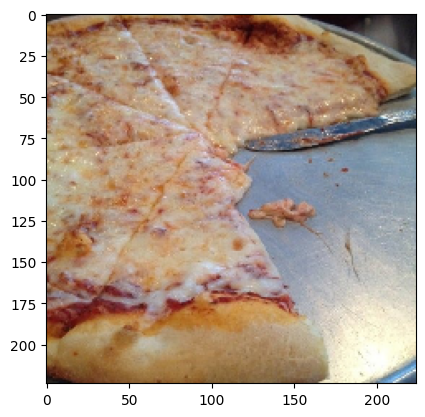

In [23]:
plt.imshow(images[27])

In [26]:
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from keras import Sequential

In [28]:
model_bl = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_bl.compile(optimizer=Adam(),
                 loss=tf.keras.losses.binary_crossentropy,
                 metrics=["accuracy"])

history_bl = model_bl.fit(train_data,
            batch_size=32,
            epochs=10,
            validation_data=test_data,
            validation_batch_size=32)

Epoch 1/10
47/47 [==============================] - 83s 2s/step - loss: 1.0797 - accuracy: 0.6233 - val_loss: 0.4936 - val_accuracy: 0.7840
Epoch 2/10
47/47 [==============================] - 89s 2s/step - loss: 0.4947 - accuracy: 0.7733 - val_loss: 0.4194 - val_accuracy: 0.8140
Epoch 3/10
16/47 [=========>....................] - ETA: 45s - loss: 0.4700 - accuracy: 0.7773

KeyboardInterrupt: 

In [ ]:
plt.plot(history_bl.epochs, history_bl.history["loss"], label="loss")
plt.plot(history_bl.epochs, history_bl.history["accuracy"], label="accuracy")
plt.legend()